<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [162]:
function binomial_p(n,k,p)
    @. (factorial(n)/(factorial(k)*factorial(n-k)))*(p^k)*((1-p)^(n-k))
end

binomial_p (generic function with 1 method)

In [163]:
binomial_p(10, 2, 0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [164]:
n = 10 # Total number of tosses
k = 5 # Number of sucessful trials to win the bet
p = 0.4 # Probability of getting head in one trial
Win = binomial_p(n,k,p)
println("Probability of winning = ", "$Win")

Probability of winning = 0.20065812480000003


The chance of losing the bet:

In [165]:
Lost = 1 - Win
println("Probability of losing = ", "$Lost")

Probability of losing = 0.7993418752


### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [166]:
Expected_Outcome = (Win* 30)-(Lost*10)
println("Expected Outcome = ", "$Expected_Outcome")

Expected Outcome = -1.973675007999999


I am expecting to lose money in this game, since the expected outcome is negative.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [167]:
n = 10 # Total number of tosses
k = 4 # Number of sucessful trials to win the bet
p = 0.4 # Probability of getting head in one trial
Win2 = binomial_p(n,k,p)
Lost2 = 1 - Win2
println("Probability of winning = ", "$Win2")
println("Probability of losing = ", "$Lost2")

Probability of winning = 0.250822656
Probability of losing = 0.749177344


In [168]:
Expected_Outcome2 = (Win2* 30)-(Lost2*10)
println("Expected Outcome = ", "$Expected_Outcome2")

Expected Outcome = 0.03290623999999909


I am expecting to earn money in this case (even if very little), since my expected outcome is positive.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [169]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Manifest.toml`


In [170]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [171]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise

11-element Vector{Float64}:
 -3.29719985156649
  6.948220199017595
  8.864317784818503
  1.5718722095049378
 13.552974606890269
 12.361736772350557
 18.205917156136156
 19.496411094110364
 21.606966543894107
 25.630261617273597
 24.837760101814357

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [172]:
using Polynomials
line_fit = Polynomials.fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 0.246615656039827
 2.673935745778289

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [173]:
function chisqr(b,m,x,y_observed,sigma)
     return sum((y_observed .- m .* x .-b).^2/sigma^2)
end

chisqr (generic function with 1 method)

In [174]:
y_observed = y_true .+ noise
fit_coeff = coeffs(fit(x,y_observed,1))
chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

11.445800416035567

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [175]:
chi2_list = []
for i in 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise
    fit_coeff = coeffs(fit(x,y_observed,1))
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [176]:
Statistics.mean(chi2_list)

8.991072001913748

The mean value (degree of freedom) makes sense because it is the result of the number of parameters subtracted by the number of coefficients. In this case, N-M = 11-2 = 9.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [191]:
x_dist = 0:0.1:30
chi2 = di.Chisq(8.991072001913748)

Distributions.Chisq{Float64}(ν=8.991072001913748)

In [192]:
di.pdf.(chi2,x_dist)

301-element Vector{Float64}:
 0.0
 1.165481416246806e-6
 1.2504082088782363e-5
 4.907614348343788e-5
 0.0001276096610635138
 0.00026480200577380176
 0.000476417211095194
 0.0007767613925728124
 0.001178381310923446
 0.001691907461281281
 0.0023259953229747966
 0.0030873348421406395
 0.003980707665366537
 ⋮
 0.0002599092988484713
 0.0002502366629593475
 0.00024091398473131015
 0.00023192905300564544
 0.00022327006241476132
 0.00021492560081772774
 0.00020688463708246757
 0.00019913650920706043
 0.00019167091277266888
 0.00018447788972066208
 0.00017754781744660114
 0.00017087139820380263

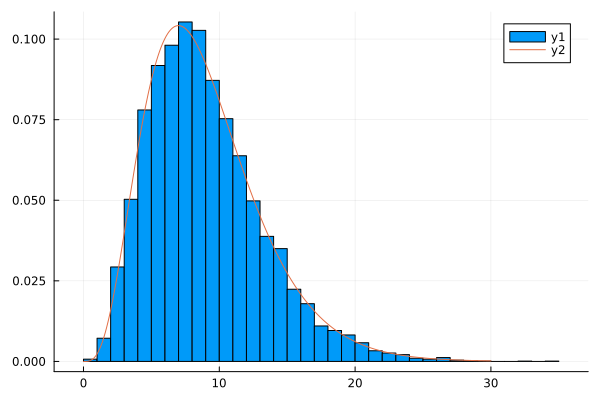

In [193]:
using Plots
x_dist = 0:0.1:30
chi2 = di.Chisq(8.991072001913748)
histogram(chi2_list, bin=50, normalize=true)
plot!(x_dist, di.pdf.(chi2,x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [180]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [181]:
m_range = 1:0.01:5;
b_range = -7:0.01:3;

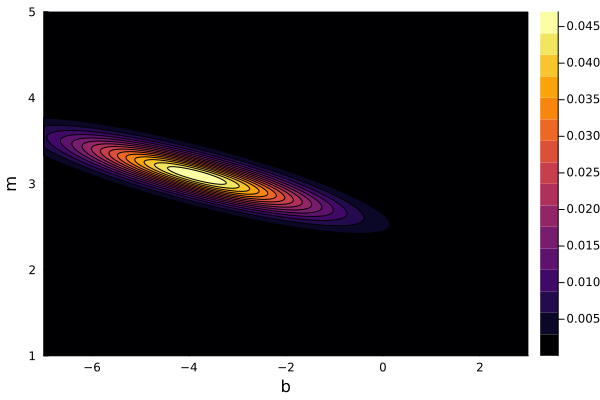

In [182]:
using Plots
contourf(b_range,m_range,p_chi2bm,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

In [183]:
x = 0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed2 = y_true .+ noise

11-element Vector{Float64}:
 -2.2612249229018513
  1.14930722828975
 -2.143007903912232
  4.508807692967582
  2.053007986759765
  1.0423936139724521
  8.734702234691103
 10.07301697753811
 11.681456591383435
 11.315861238241098
 11.54141694135106

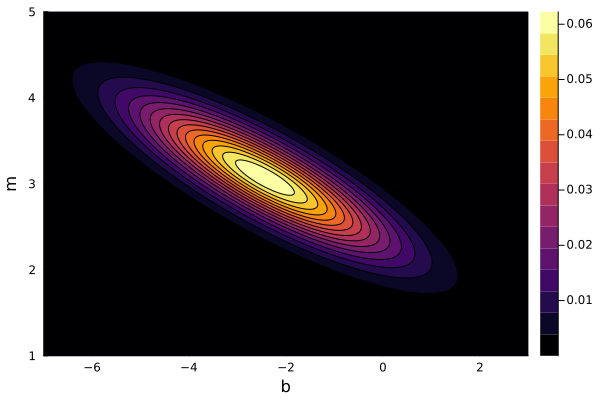

In [184]:
chi2bm(b,m) = chisqr(b,m,x,y_observed2,sigma)
contourf(b_range,m_range,p_chi2bm,xlabel="b",ylabel="m")

The plot in this case got larger and wider. It is also shifted towards the right (higher b values).

In [185]:
x = 0:2:20
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed3 = y_true .+ noise

11-element Vector{Float64}:
 -5.631480212938848
  2.9684146453285494
 12.02319664827516
 17.821092200807797
 22.350314641056165
 29.99424515440396
 30.202911774256123
 38.685859534047474
 43.288636959679195
 53.28484233641608
 60.32242596782226

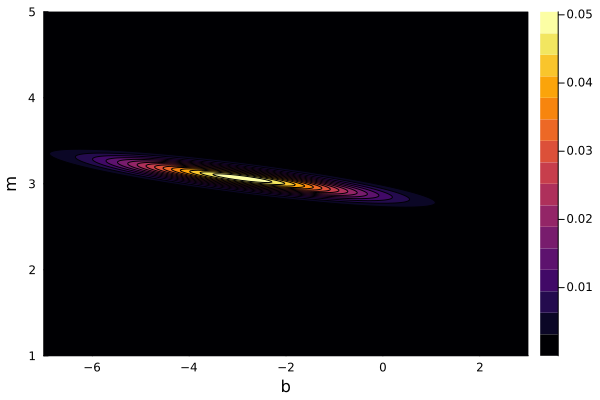

In [186]:
chi2bm(b,m) = chisqr(b,m,x,y_observed3,sigma)
contourf(b_range,m_range,p_chi2bm,xlabel="b",ylabel="m")

The plot got narrower in this case (smaller range of m values).

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

In [187]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed4 = y_true .+ noise

11-element Vector{Float64}:
  8.51758967446462
 -5.013586717888603
 10.613467606667264
  7.871789501595305
  9.5374719976918
 12.753918794501503
 17.198474580845485
 21.590272138124647
 18.154838441473448
 20.14702460390012
 24.25631169289954

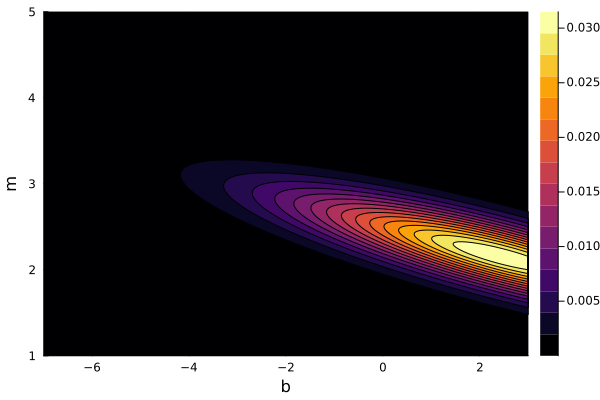

In [188]:
chi2bm(b,m) = chisqr(b,m,x,y_observed4,sigma)
contourf(b_range,m_range,p_chi2bm,xlabel="b",ylabel="m")

The plot seems to have been shifted towards the right (higher b values), while also shifting down (lower m values).

In [189]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed5 = y_true .+ noise

11-element Vector{Float64}:
 -1.5796494562617538
 -0.18951933316417868
  3.7246476660306334
  5.371044808894926
 10.812416041367461
 13.517468944776141
 16.381087910135967
 19.140066636133703
 21.80641509854682
 26.75245699645156
 27.199468204724475

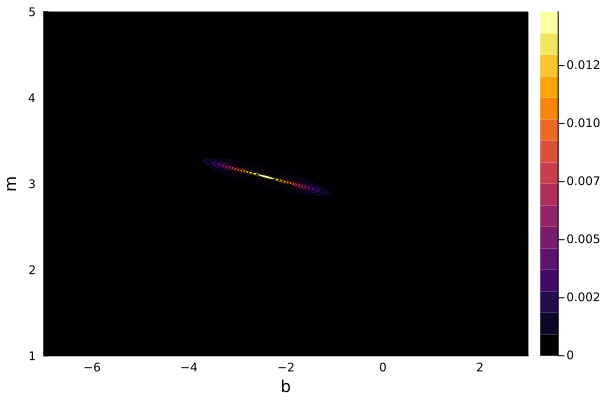

In [190]:
chi2bm(b,m) = chisqr(b,m,x,y_observed5,sigma)
contourf(b_range,m_range,p_chi2bm,xlabel="b",ylabel="m")

The plot seems to have gotten really small and narrow (scale is smaller as well).